# Generation of plots for the ``Deviation of corners'' project
## Created by M.S. Mukhametzhanov
### Given deviations of floor vs ceiling corners of a model with ground truth labels for the room name and number of corners in that room with predictions. 
### Aim: to create meaningful statistics of how well the model performed.


Import all necessary libraries: 
- check and install the libraries from the requirements.txt file to be sure to use the same versions of the libraries
- myplotlib -- the main created project
- matplotlib for loading of the generated images
- re for working with paths

In [5]:
!pip -vvv freeze -r requirements.txt | grep "not installed"
#!pip install -r requirements.txt --user
#import pandas as pd
import myplotlib
#import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import re
#import numpy as np
pl = myplotlib.plotlib

Let's create auxiliary functions for loading the generated images from the paths (``show_img``) and for finding the required file (``find_plot``)

In [2]:
json_name = 'https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json'
newpl = pl()
def show_img(f,ax):
    my_img = plt.imread(f)
    #fig, ax = plt.subplots(figsize=(25,25))
    ax.imshow(my_img)
    ax.axis('off')
def find_plot(paths,col1,col2=''):
    for f in paths:
        if re.match('.*\['+col1+'\]\['+col2+'\].*',f):
            return f
    return None

Let's build the first graph for measuring the model: the histogram of the target columns "gt_corners" and "rb_corners". This can show if the classes are balanced (which has a very strong influence on the results interpretation and analysis).

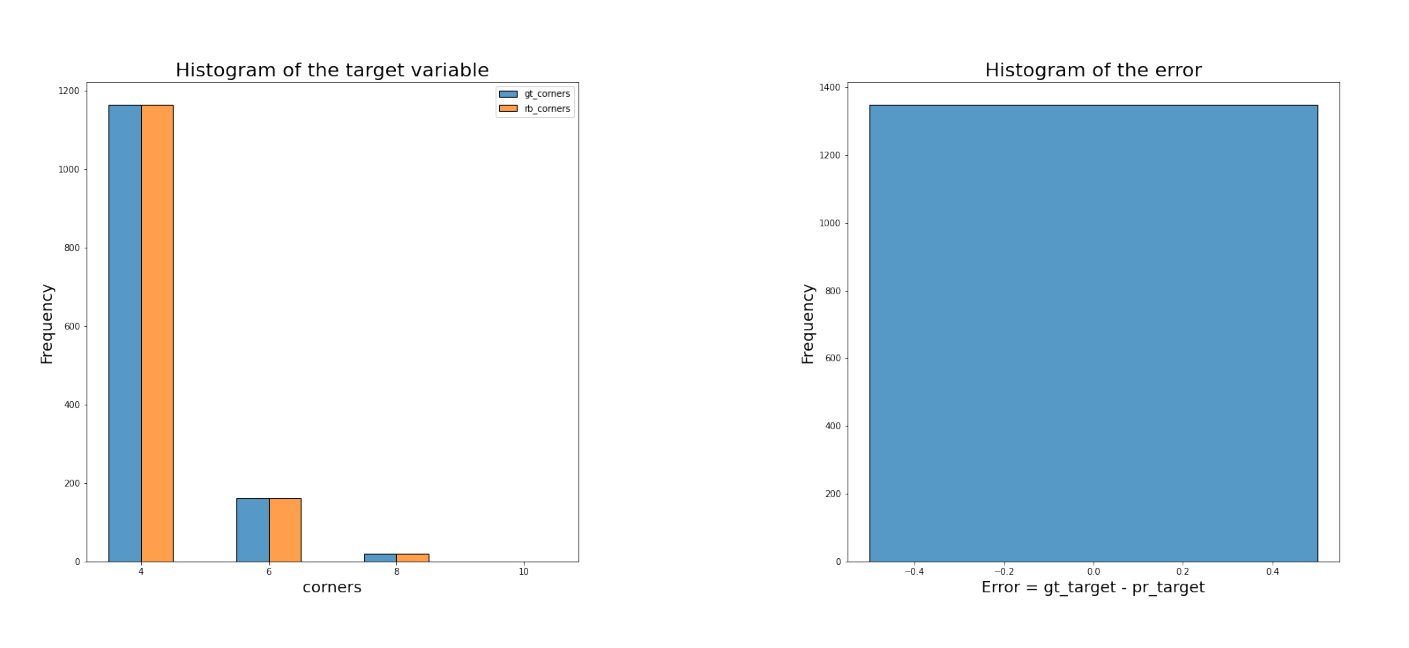

In [6]:
paths_hist = newpl.draw_plots(json_name, 'hist')
fig, axs = plt.subplots(1,2,figsize=(25,25))
x = iter(paths_hist)
for i in range(len(paths_hist)):
    f = next(x)
    show_img(f,axs[i])

From the histogram we can already see if the model is well-performed. The first plot shows simply the histograms of the target columns. If the histograms are (almost) equal, then the model is probably well performed. But this can also happen in the case of miss-classification with the same numbers of the elements in each class: in this case, the model is wrong, but the histogram will show the same distributions. In order to check the errors, let's study the histogram of the error: df.ground_truth - df_predicted. This histogram shows how many elements have been classified correctly (the error = 0) and how many elements have been misclassified. It can also show how many elements have been misclassified for particular cases (e.g., the error < 0 is related to the cases when the number of "corners" has been underestimated). 

Let us see now the scatter plot of the ground_truth values vs predicted values. The ground truth values are separated by the color, while the predicted values are separated by the shape of the marker. The correctly classified instances should have the marker color and shape of the same type:

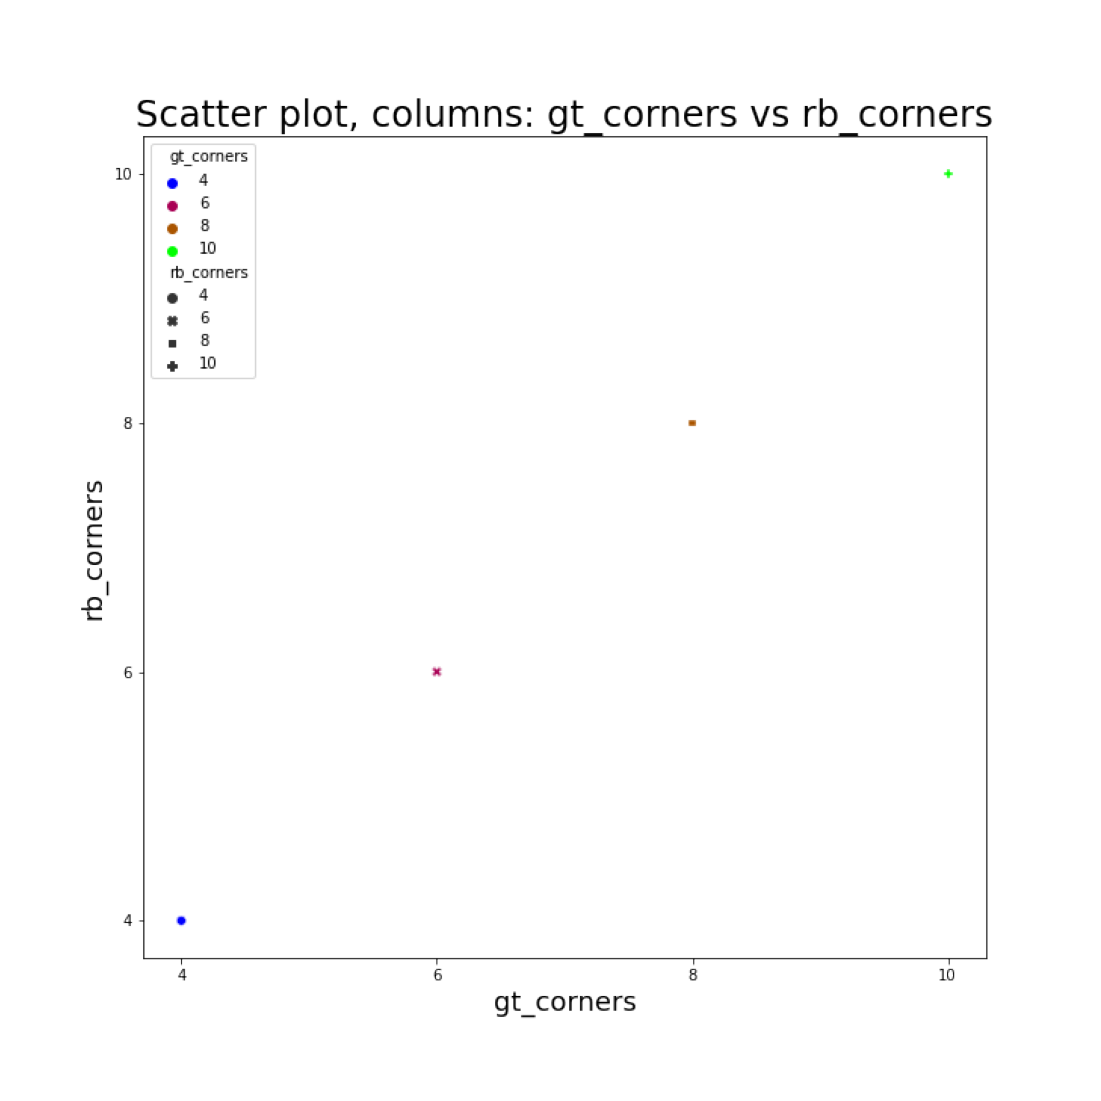

In [7]:
paths_scatter = newpl.draw_plots(json_name, 'scatter')
fig, ax = plt.subplots(1,figsize=(20,20))
show_img(find_plot(paths_scatter,'gt_corners','rb_corners'),ax)

Since the target variable is discrete (i.e., we are studying the classification problem), then we can also study the confusion matrix being one of the main metrics for studying the performance of the model:

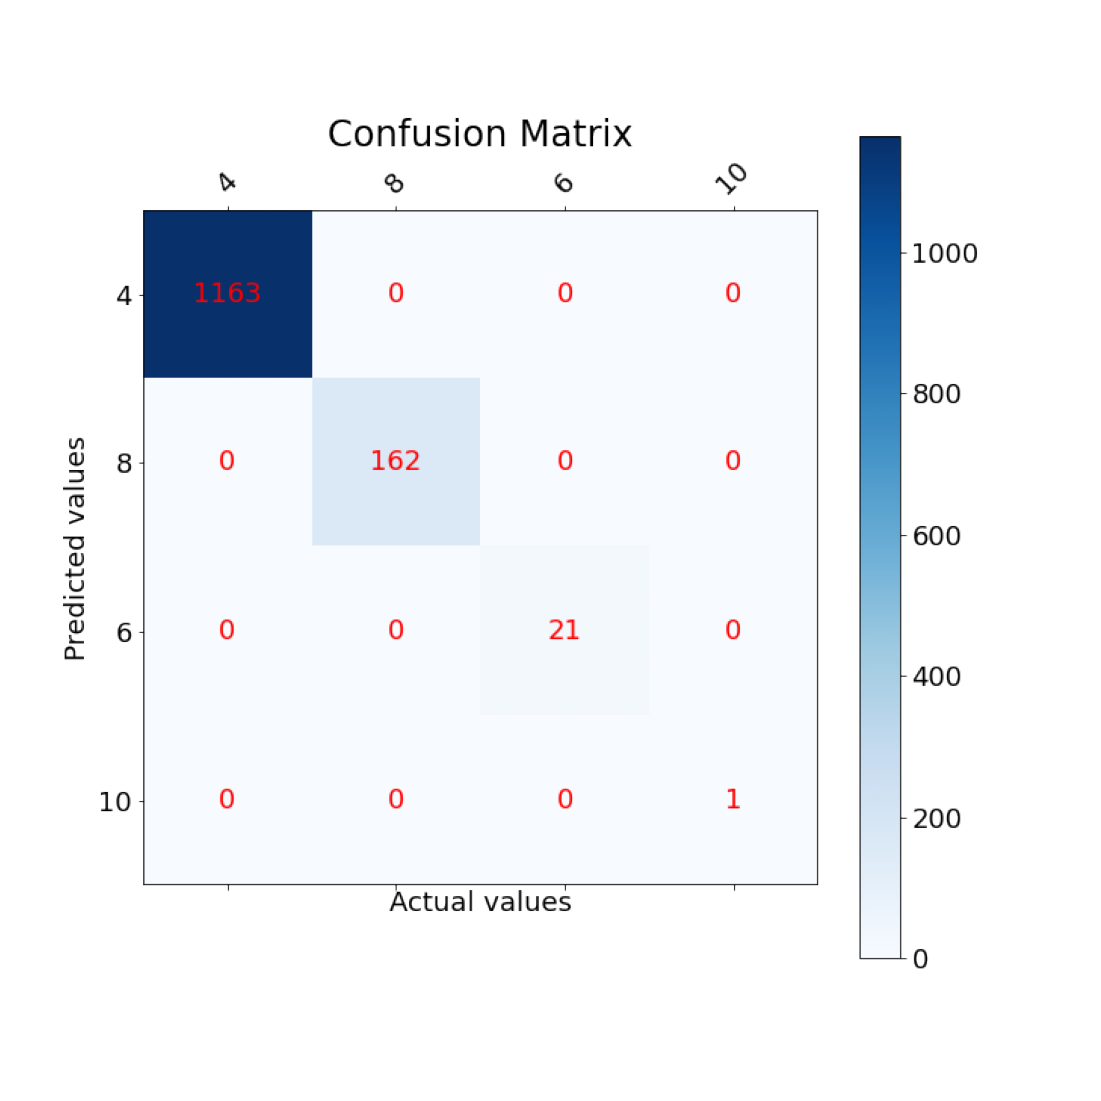

In [8]:
paths_conf = newpl.draw_plots(json_name, 'conf')
fig, ax = plt.subplots(1,figsize=(20,20))
show_img(paths_conf.pop(),ax)

Since we see that the classes are unbalanced, then we can build a roc-curve. However, the roc-curves are usually constructed for binary classification only. There are several ways for adapting it to the multi-class case: averaging (micro, macro, etc.), building roc-curves for each class separately, etc. Here the micro-average, macro-average and separate roc-curves for each class are constructed: 

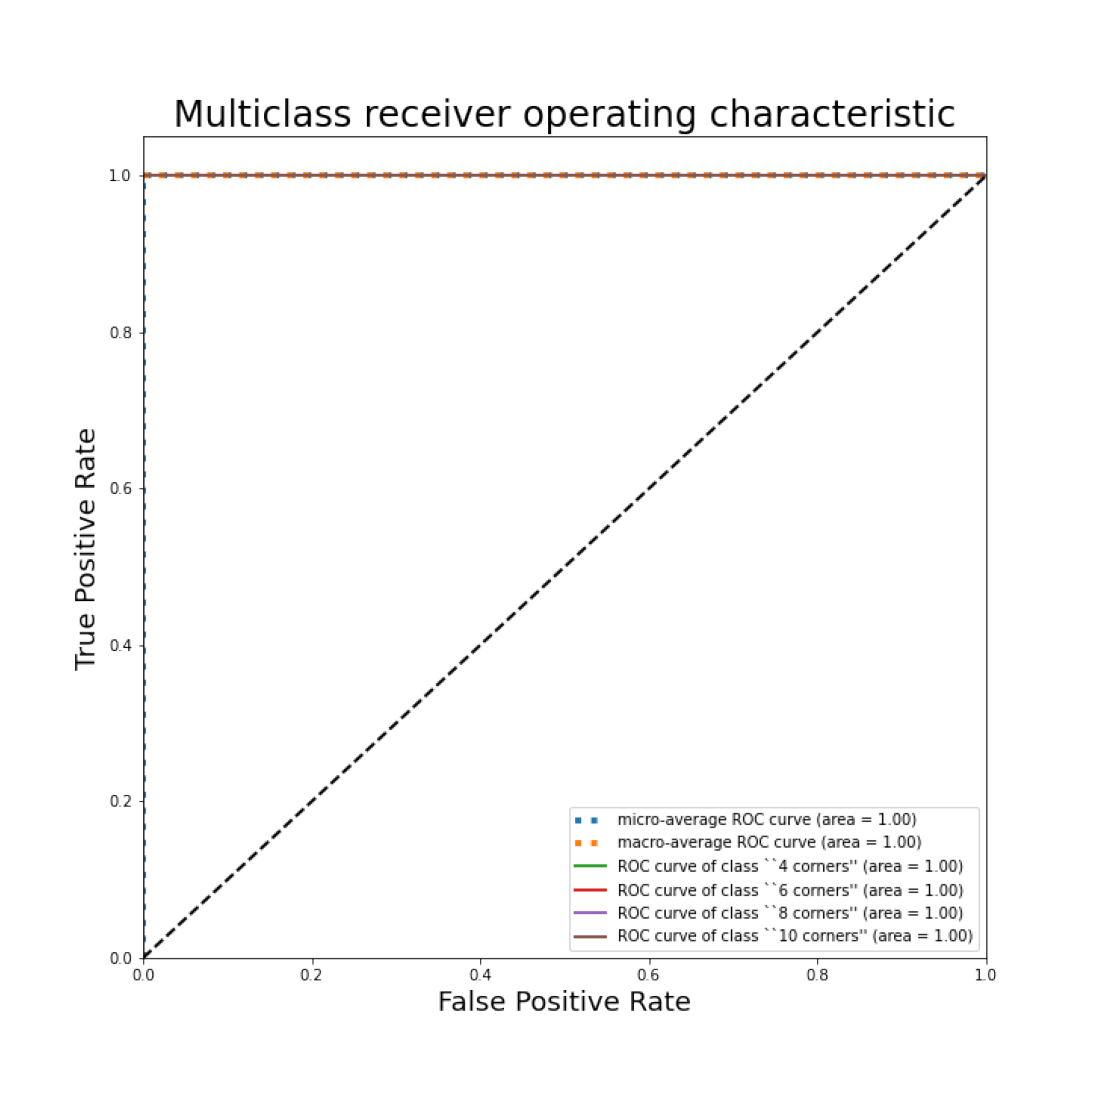

In [9]:
paths_roc = newpl.draw_plots(json_name, 'roc')
fig, ax = plt.subplots(1,figsize=(20,20))
show_img(paths_roc.pop(),ax)

Now we can make conclusions on how well the model performed. In order to improve it for a further study, it can be also useful to study the columns of the dataframe. The first step is to check the correlations between the columns:

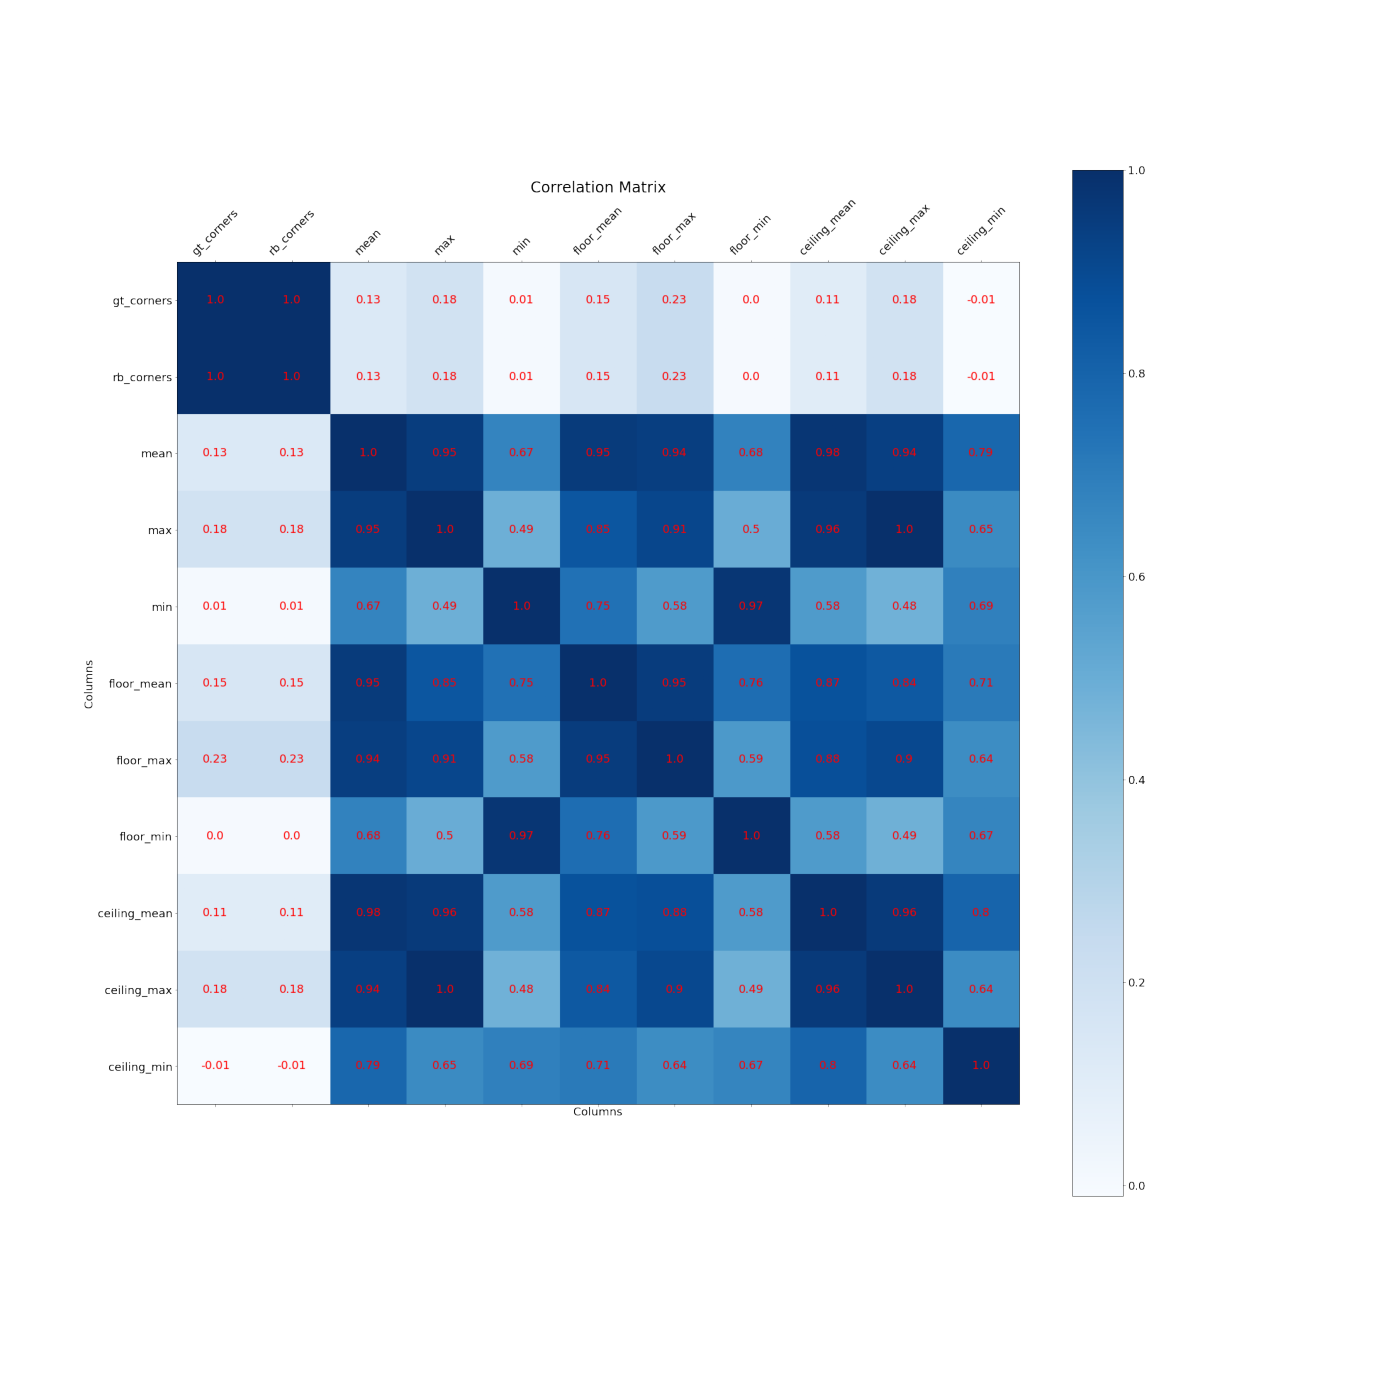

In [10]:
paths_corr = newpl.draw_plots(json_name, 'corr')
fig, ax = plt.subplots(figsize=(25,25))
for f in paths_corr:
    show_img(f,ax)

It can be also useful to see the distributions of the columns for each class:

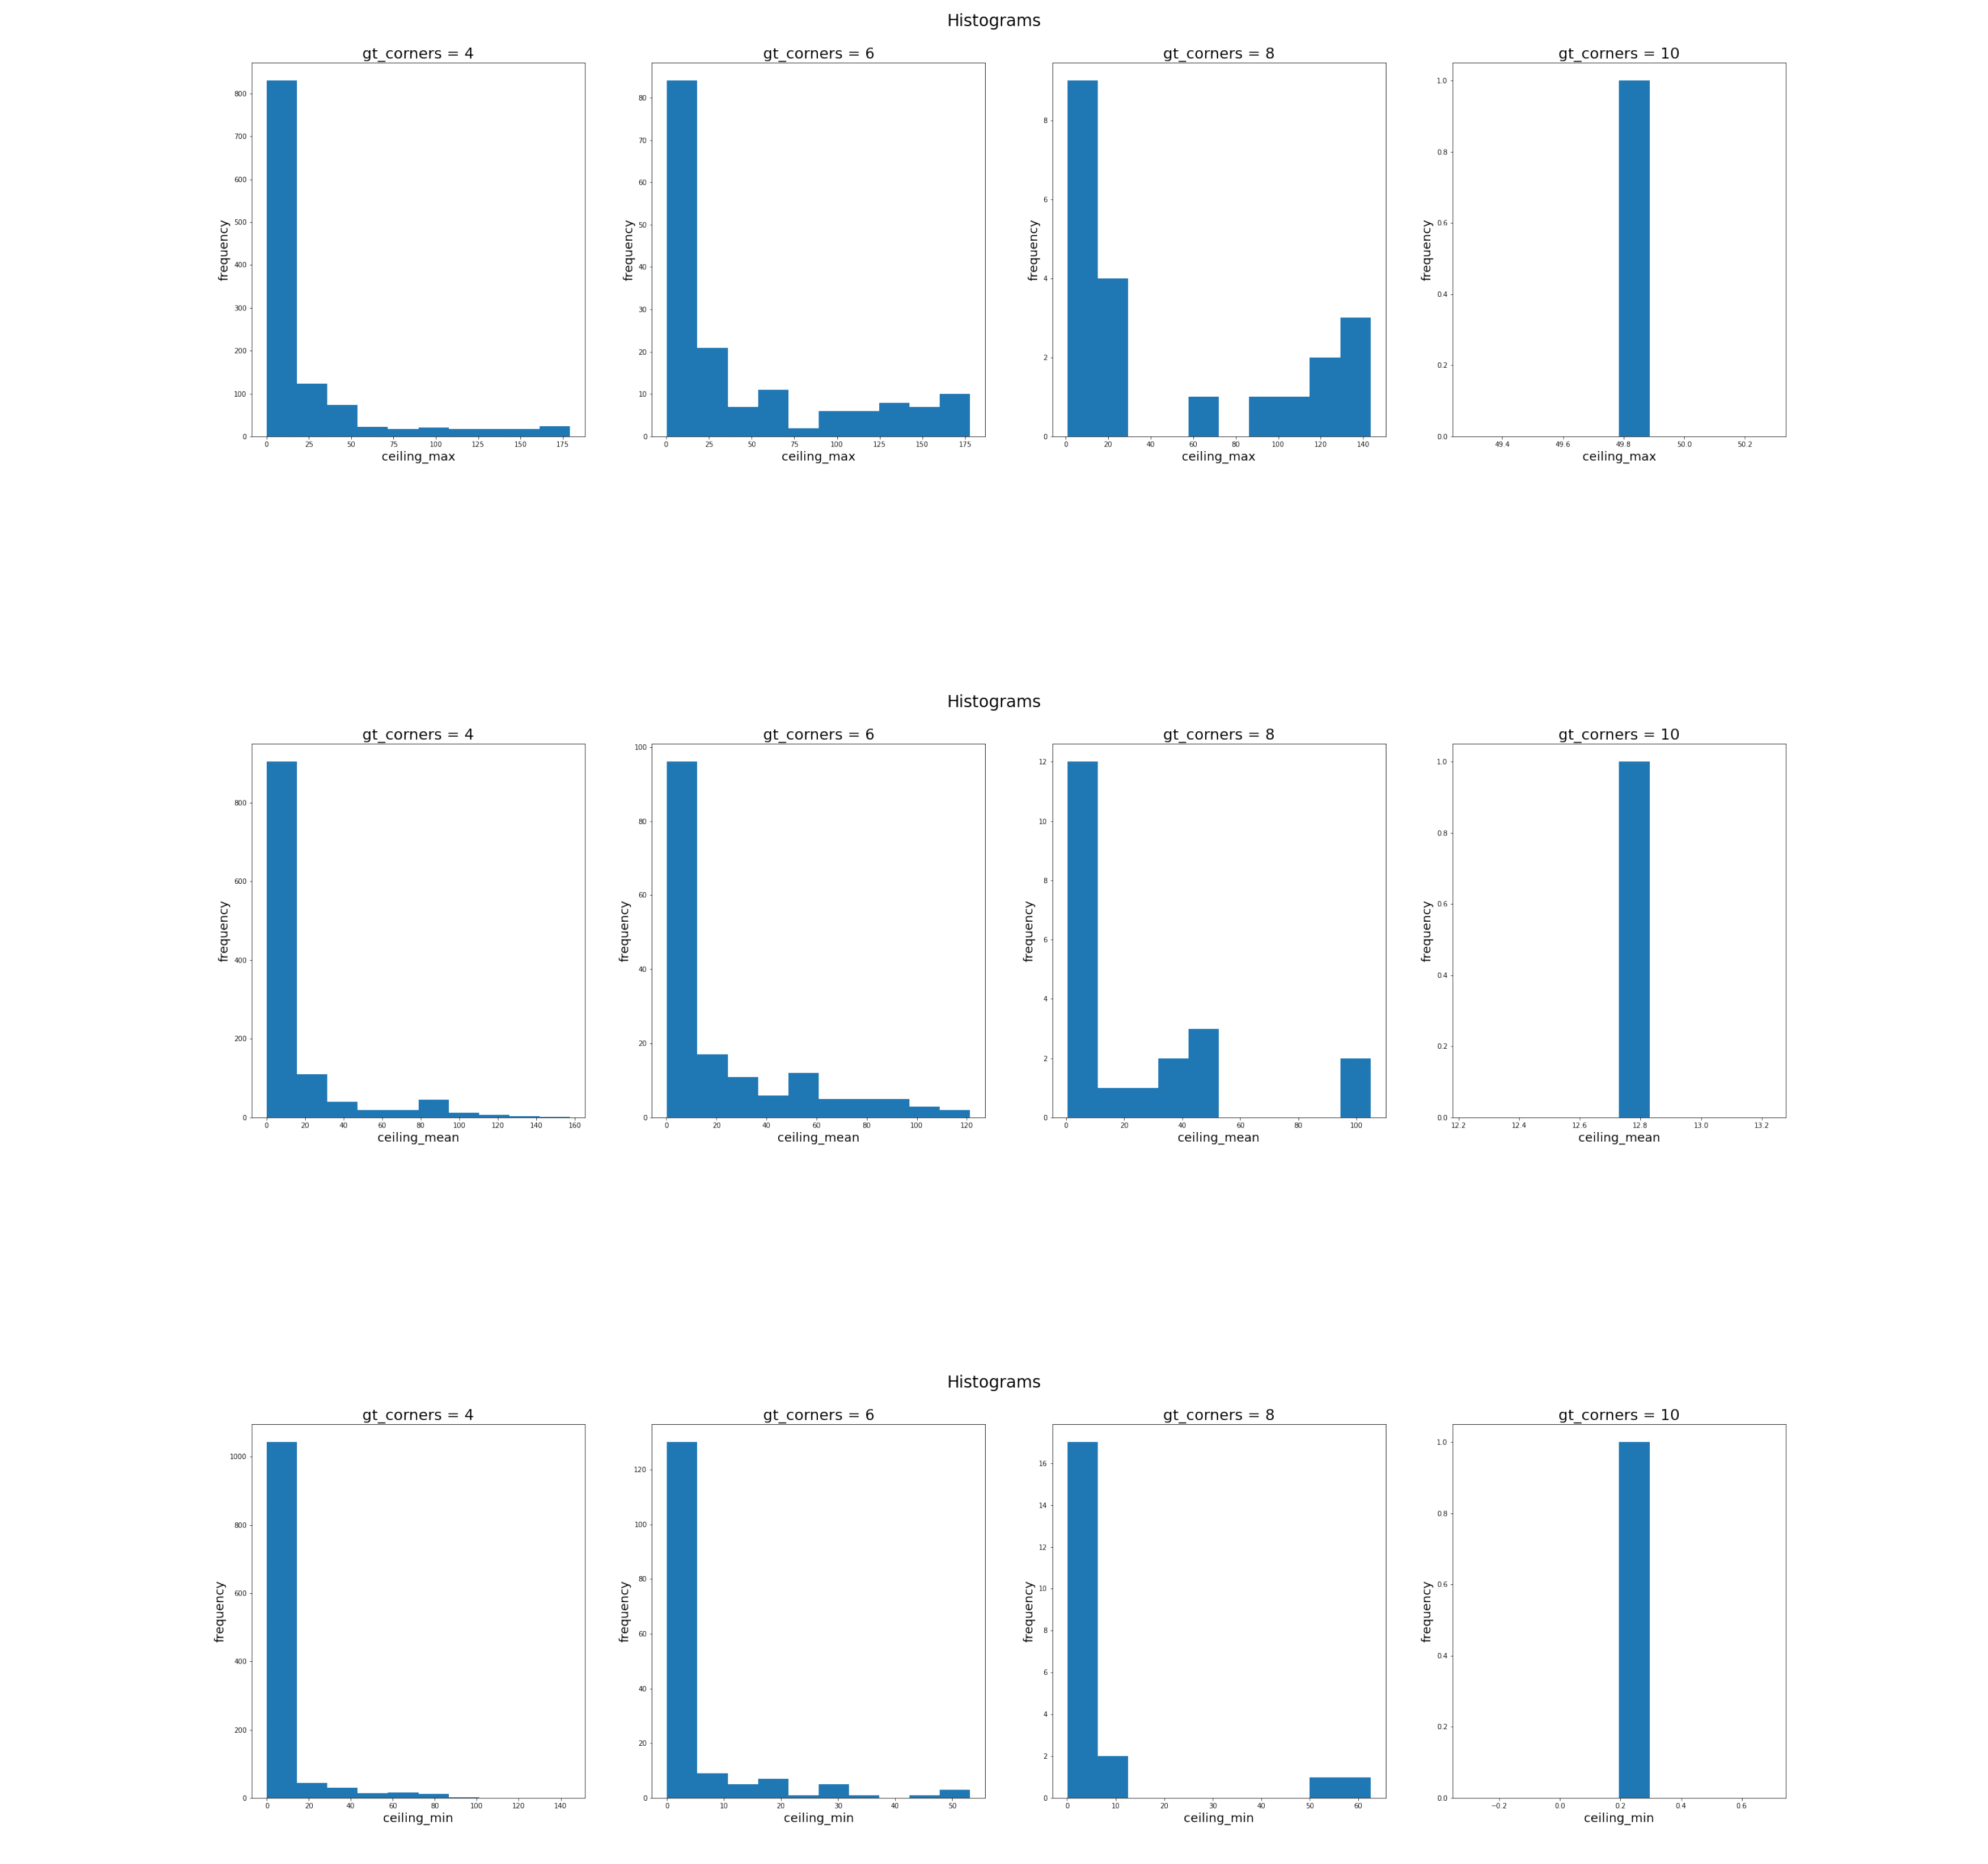

In [11]:
paths_his_all = list(newpl.draw_plots(json_name, 'hisplot'))
paths_his_all.sort()
fig, axs = plt.subplots(3,1,figsize=(60,60))
for i in range(3):
    show_img(paths_his_all[i],axs[i])


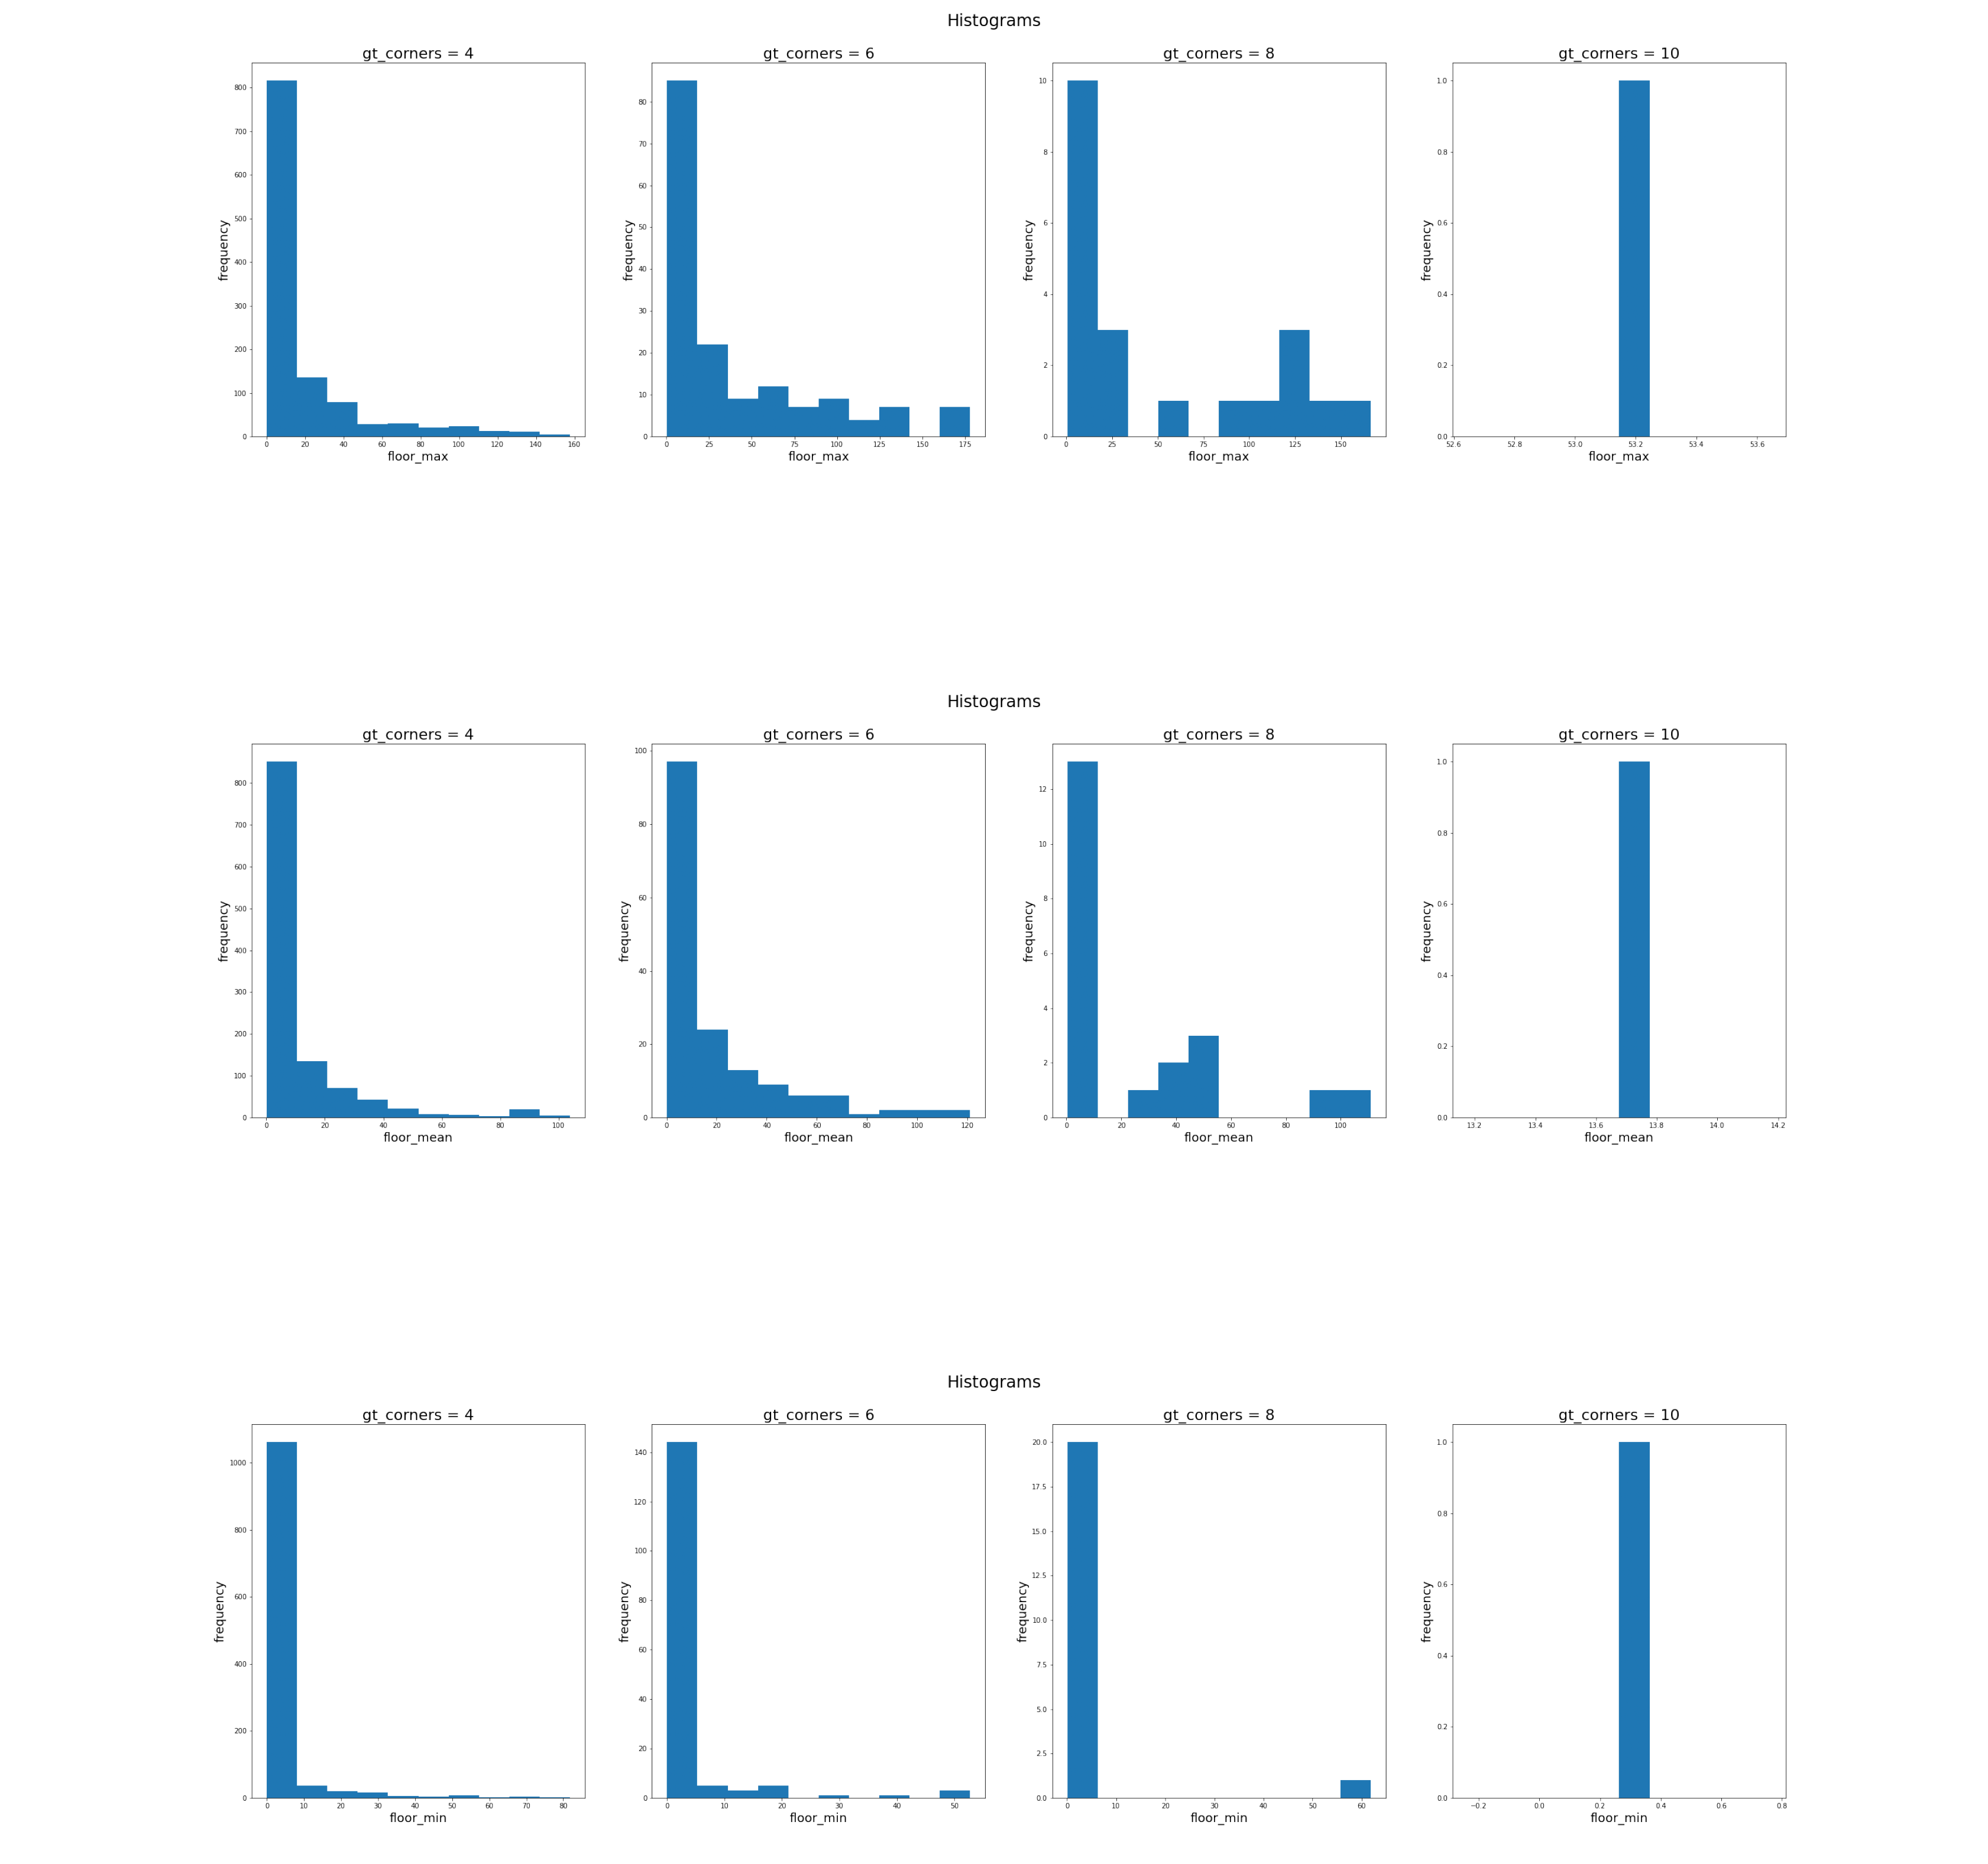

In [12]:
fig, axs = plt.subplots(3,1,figsize=(60,60))
for i in range(3,6):
    show_img(paths_his_all[i],axs[i-3])

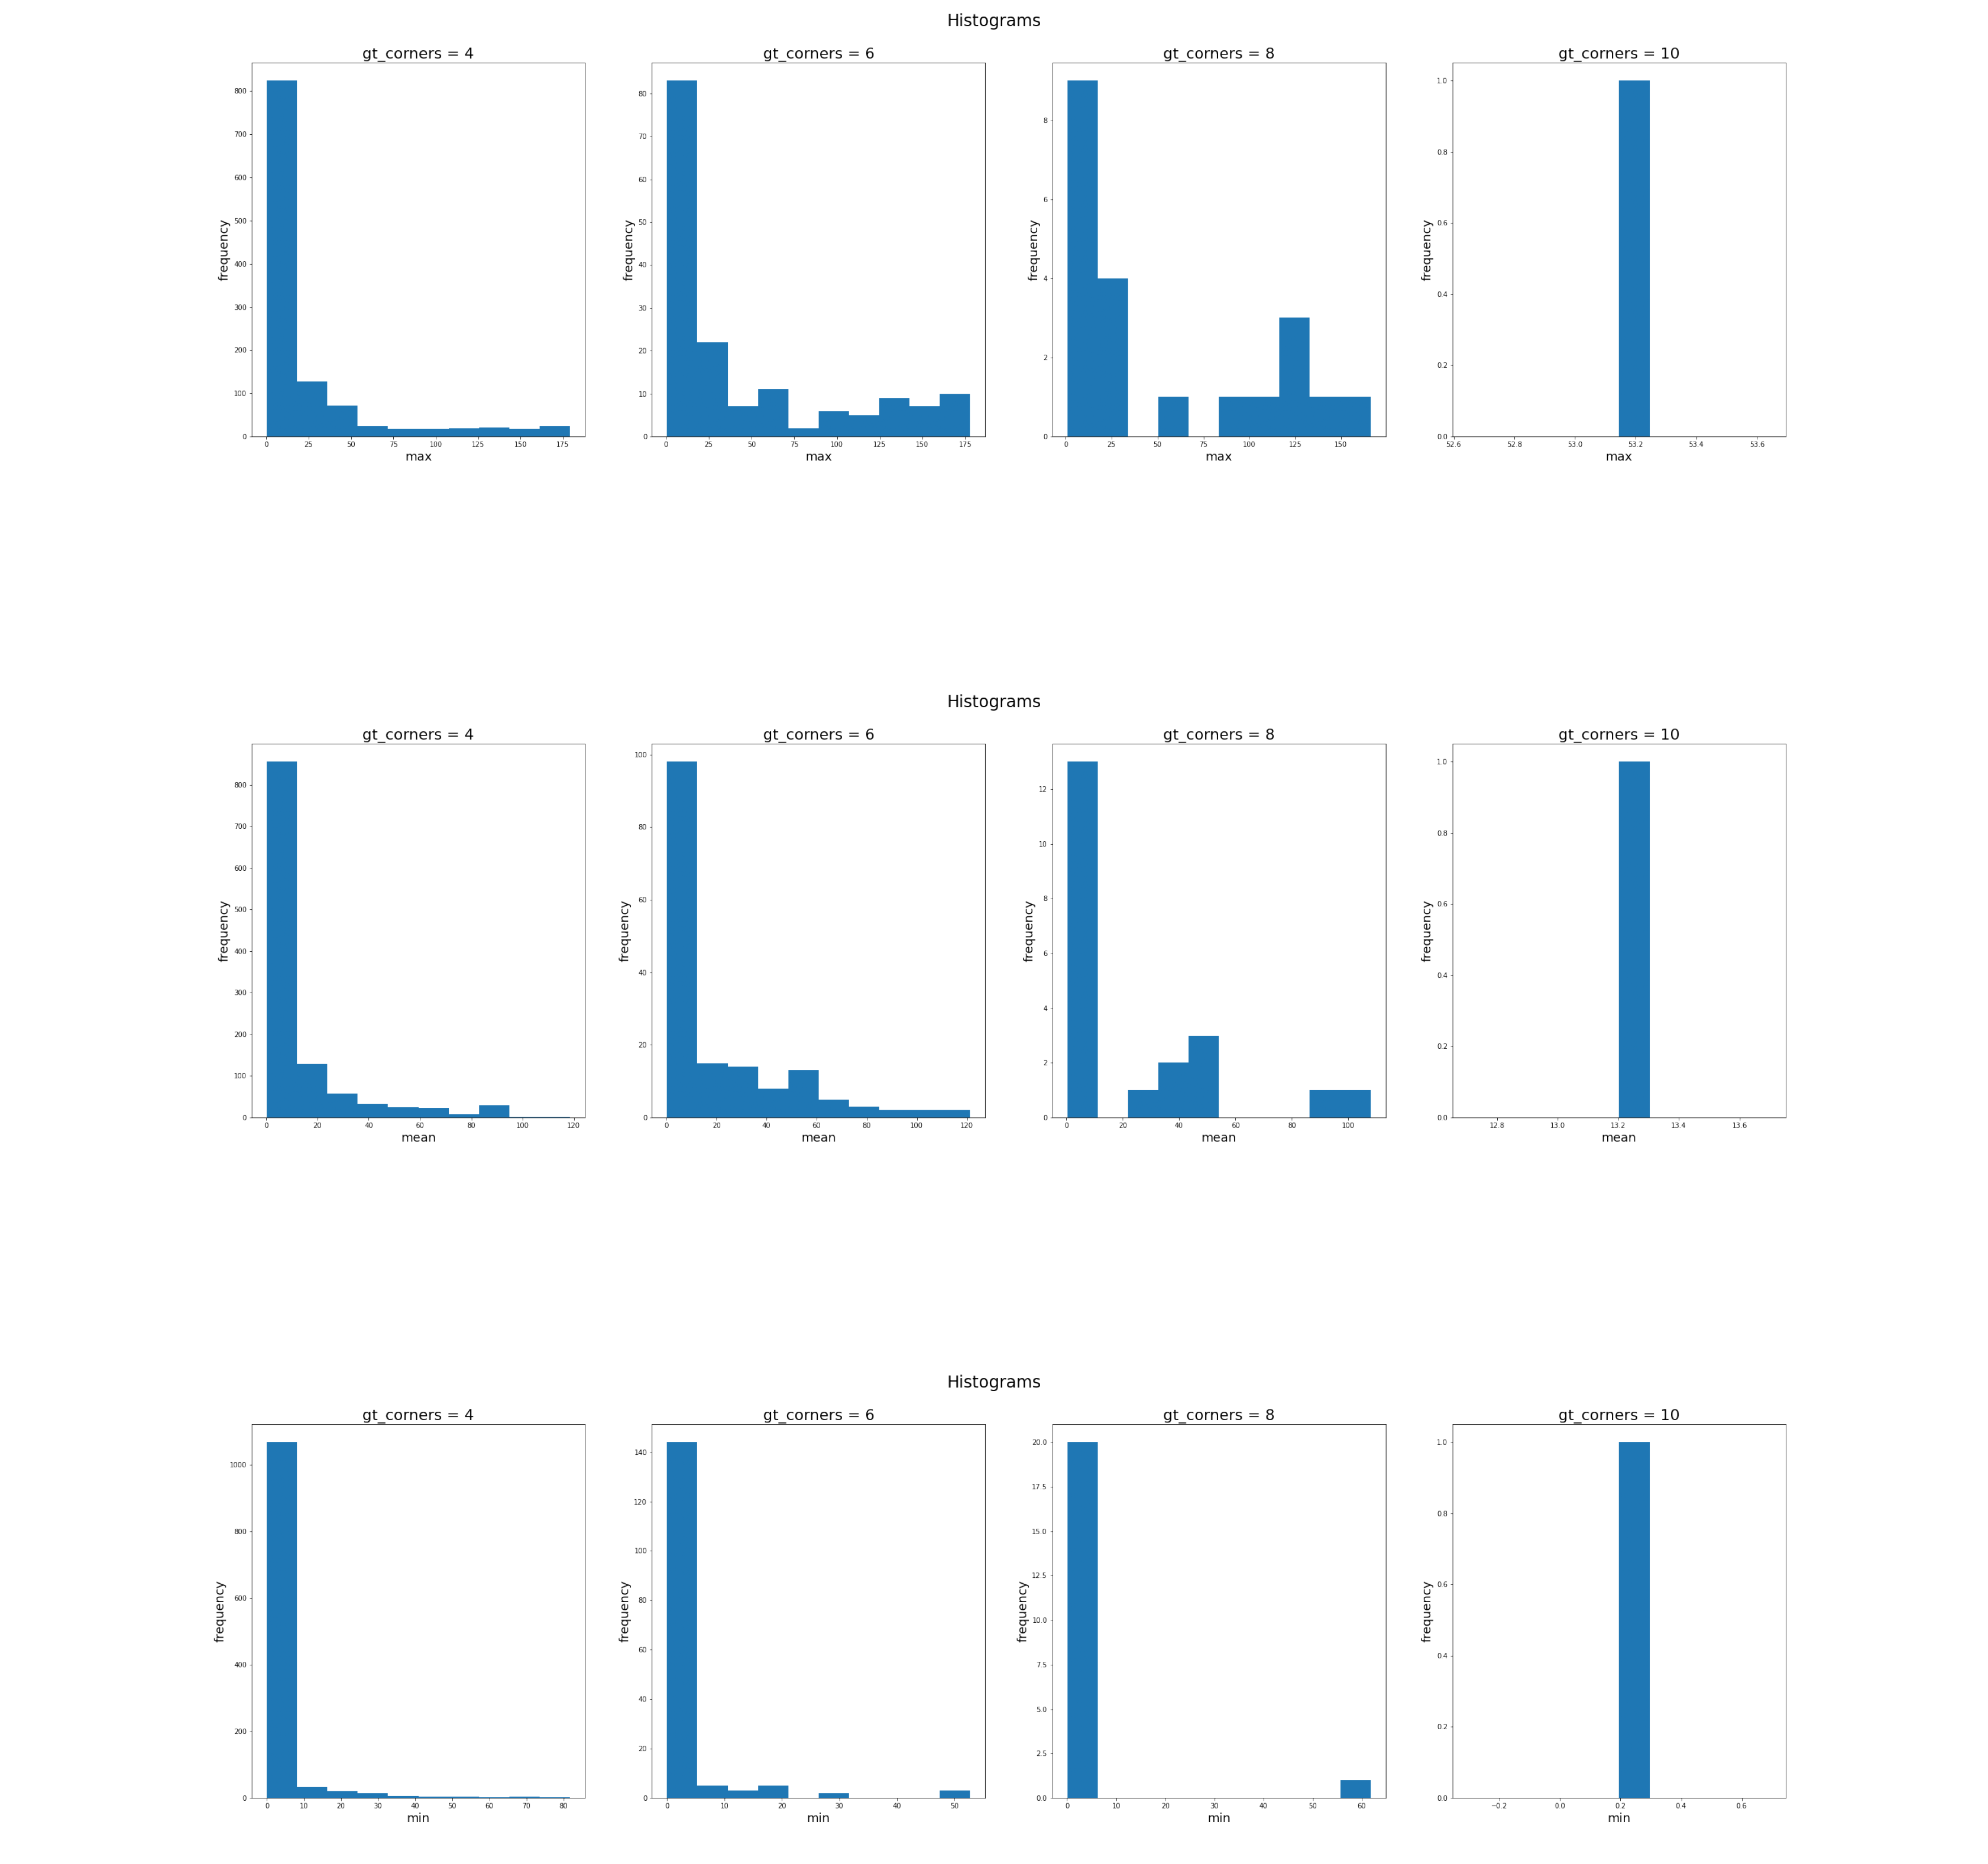

In [13]:
fig, axs = plt.subplots(3,1,figsize=(60,60))
for i in range(7,10):
    show_img(paths_his_all[i],axs[i-7])

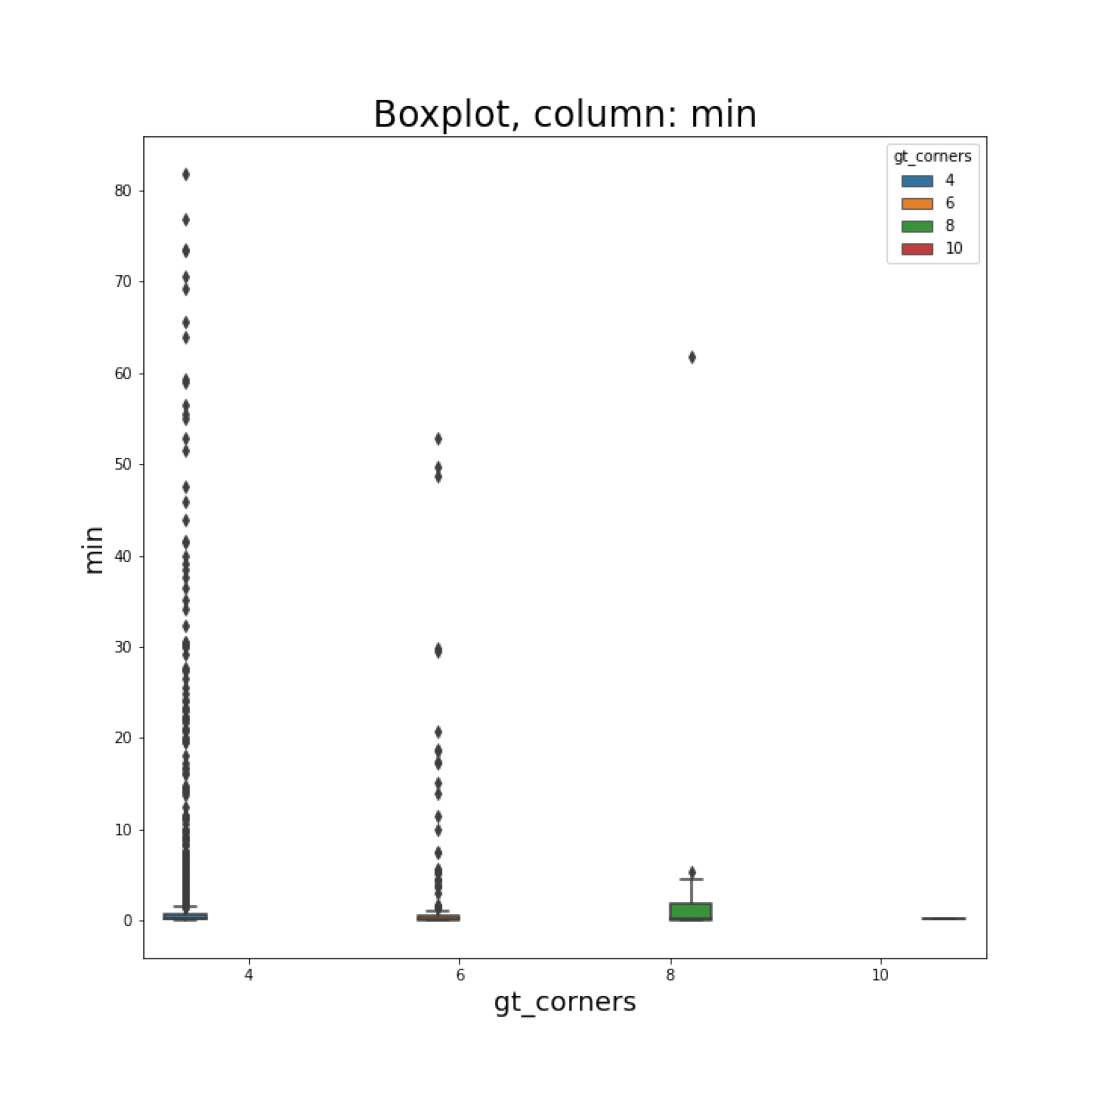

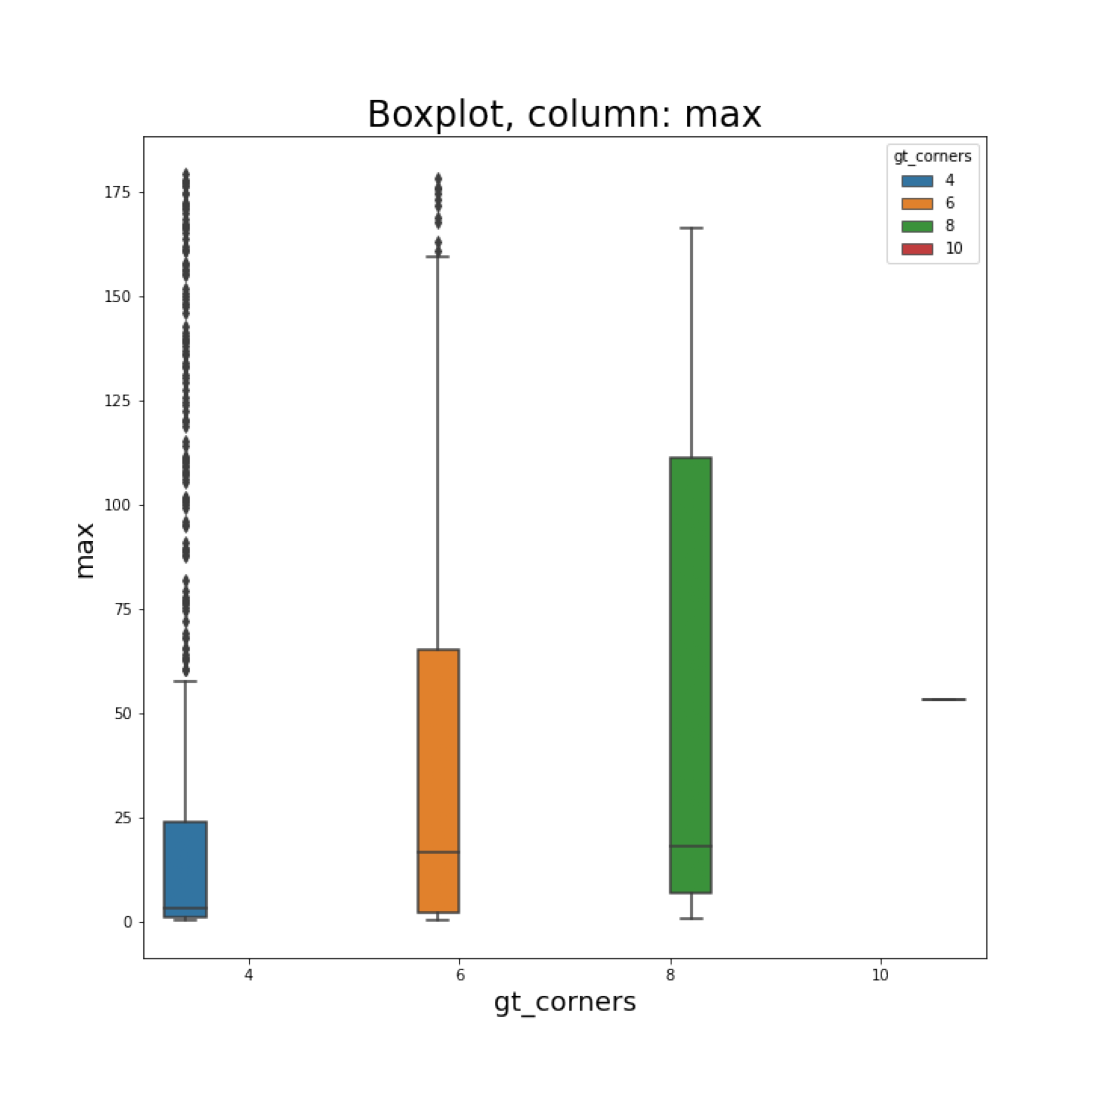

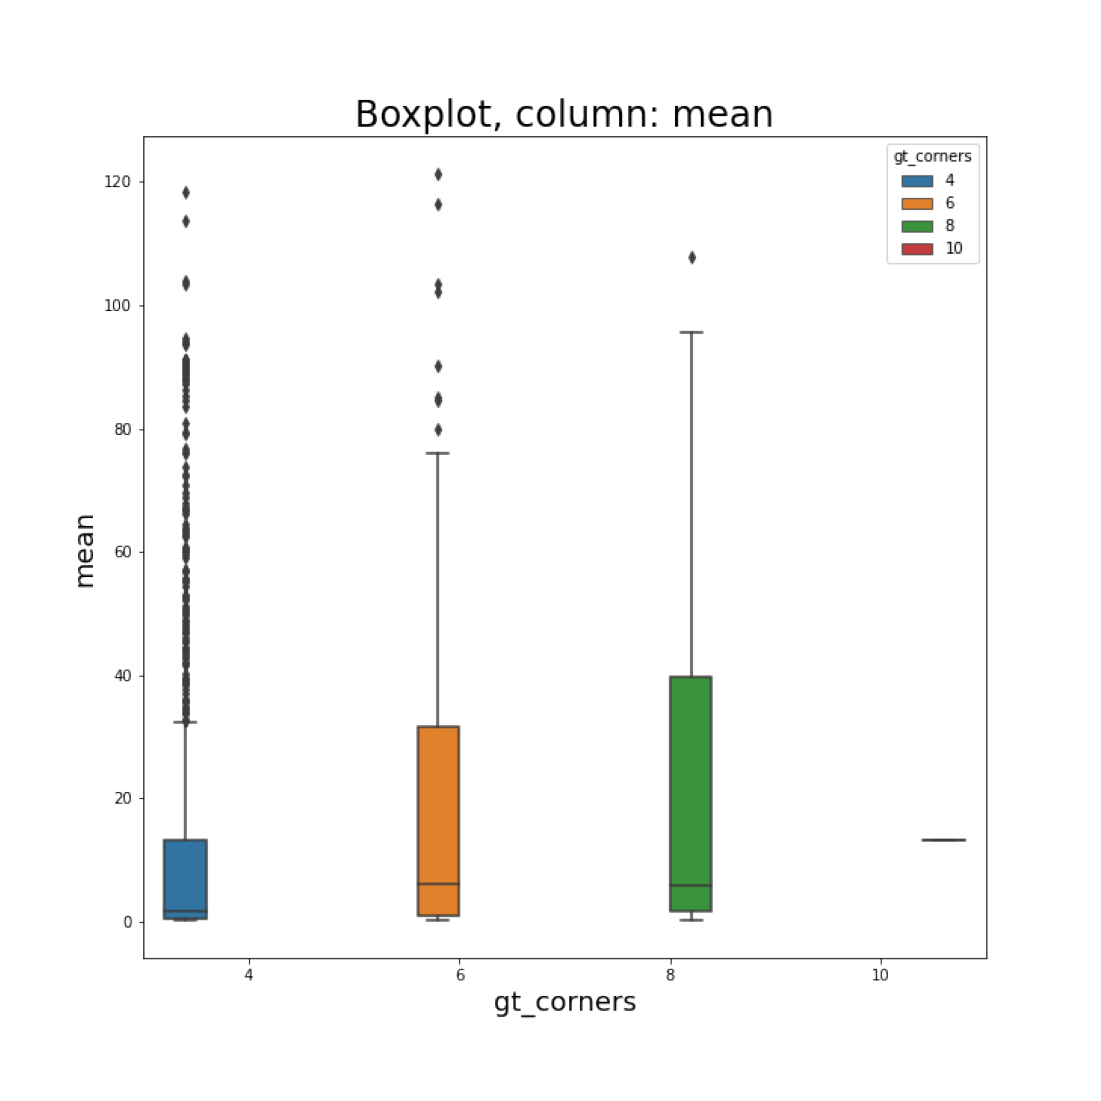

In [14]:
paths_box = newpl.draw_plots(json_name, 'boxplot')
x = iter(paths_box)
for i in range(len(paths_box)):
    f = next(x)
    if not re.match('.*\[\]\[.+\].png',f) and re.match('.*\[m[iea].+\].png',f):
        fig, ax = plt.subplots(1,figsize=(20,20))
        show_img(f,ax)

Finally, explicit scatter plots of each column vs. each other column can be also useful to understand which columns are the most suitable for the model

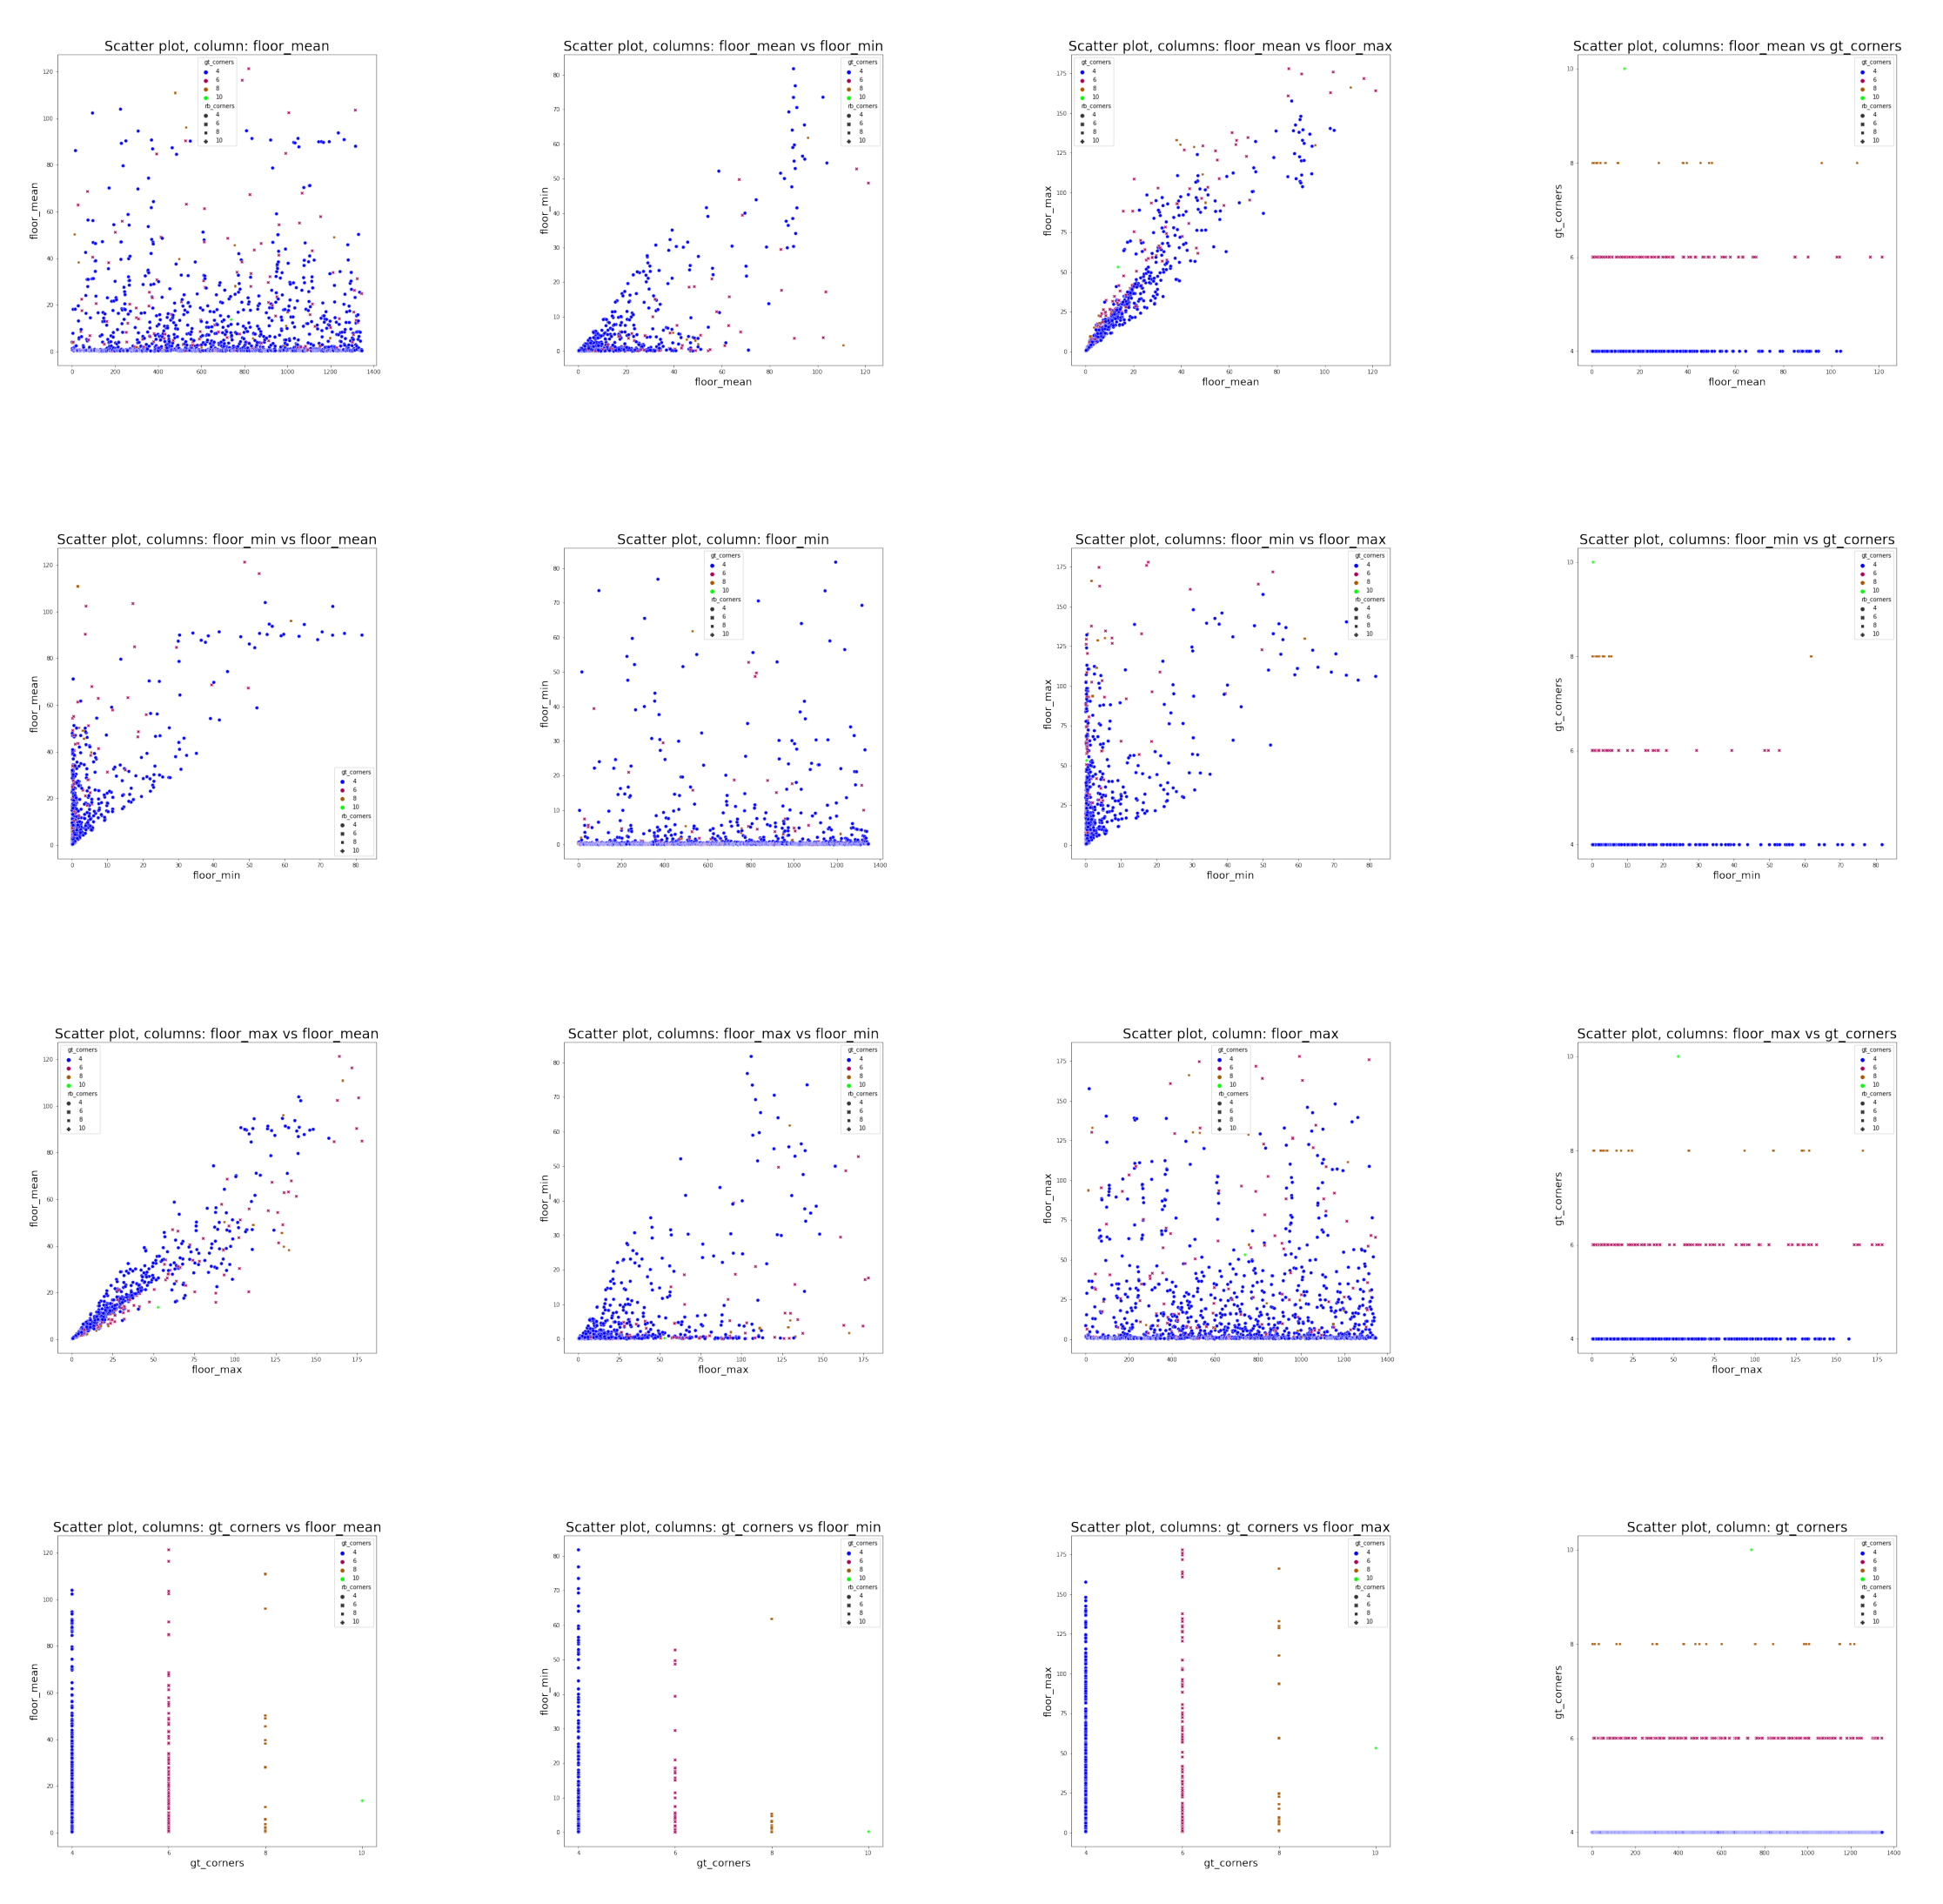

In [15]:
cols = ['floor_mean','floor_min','floor_max','gt_corners']
fig, axs = plt.subplots(len(cols),len(cols),figsize=(40,40))
for i in range(len(cols)):
    show_img(find_plot(paths_scatter,cols[i]),axs[i][i])
    for j in range(len(cols)):
        if i!=j:
            show_img(find_plot(paths_scatter,cols[i],cols[j]),axs[i][j])


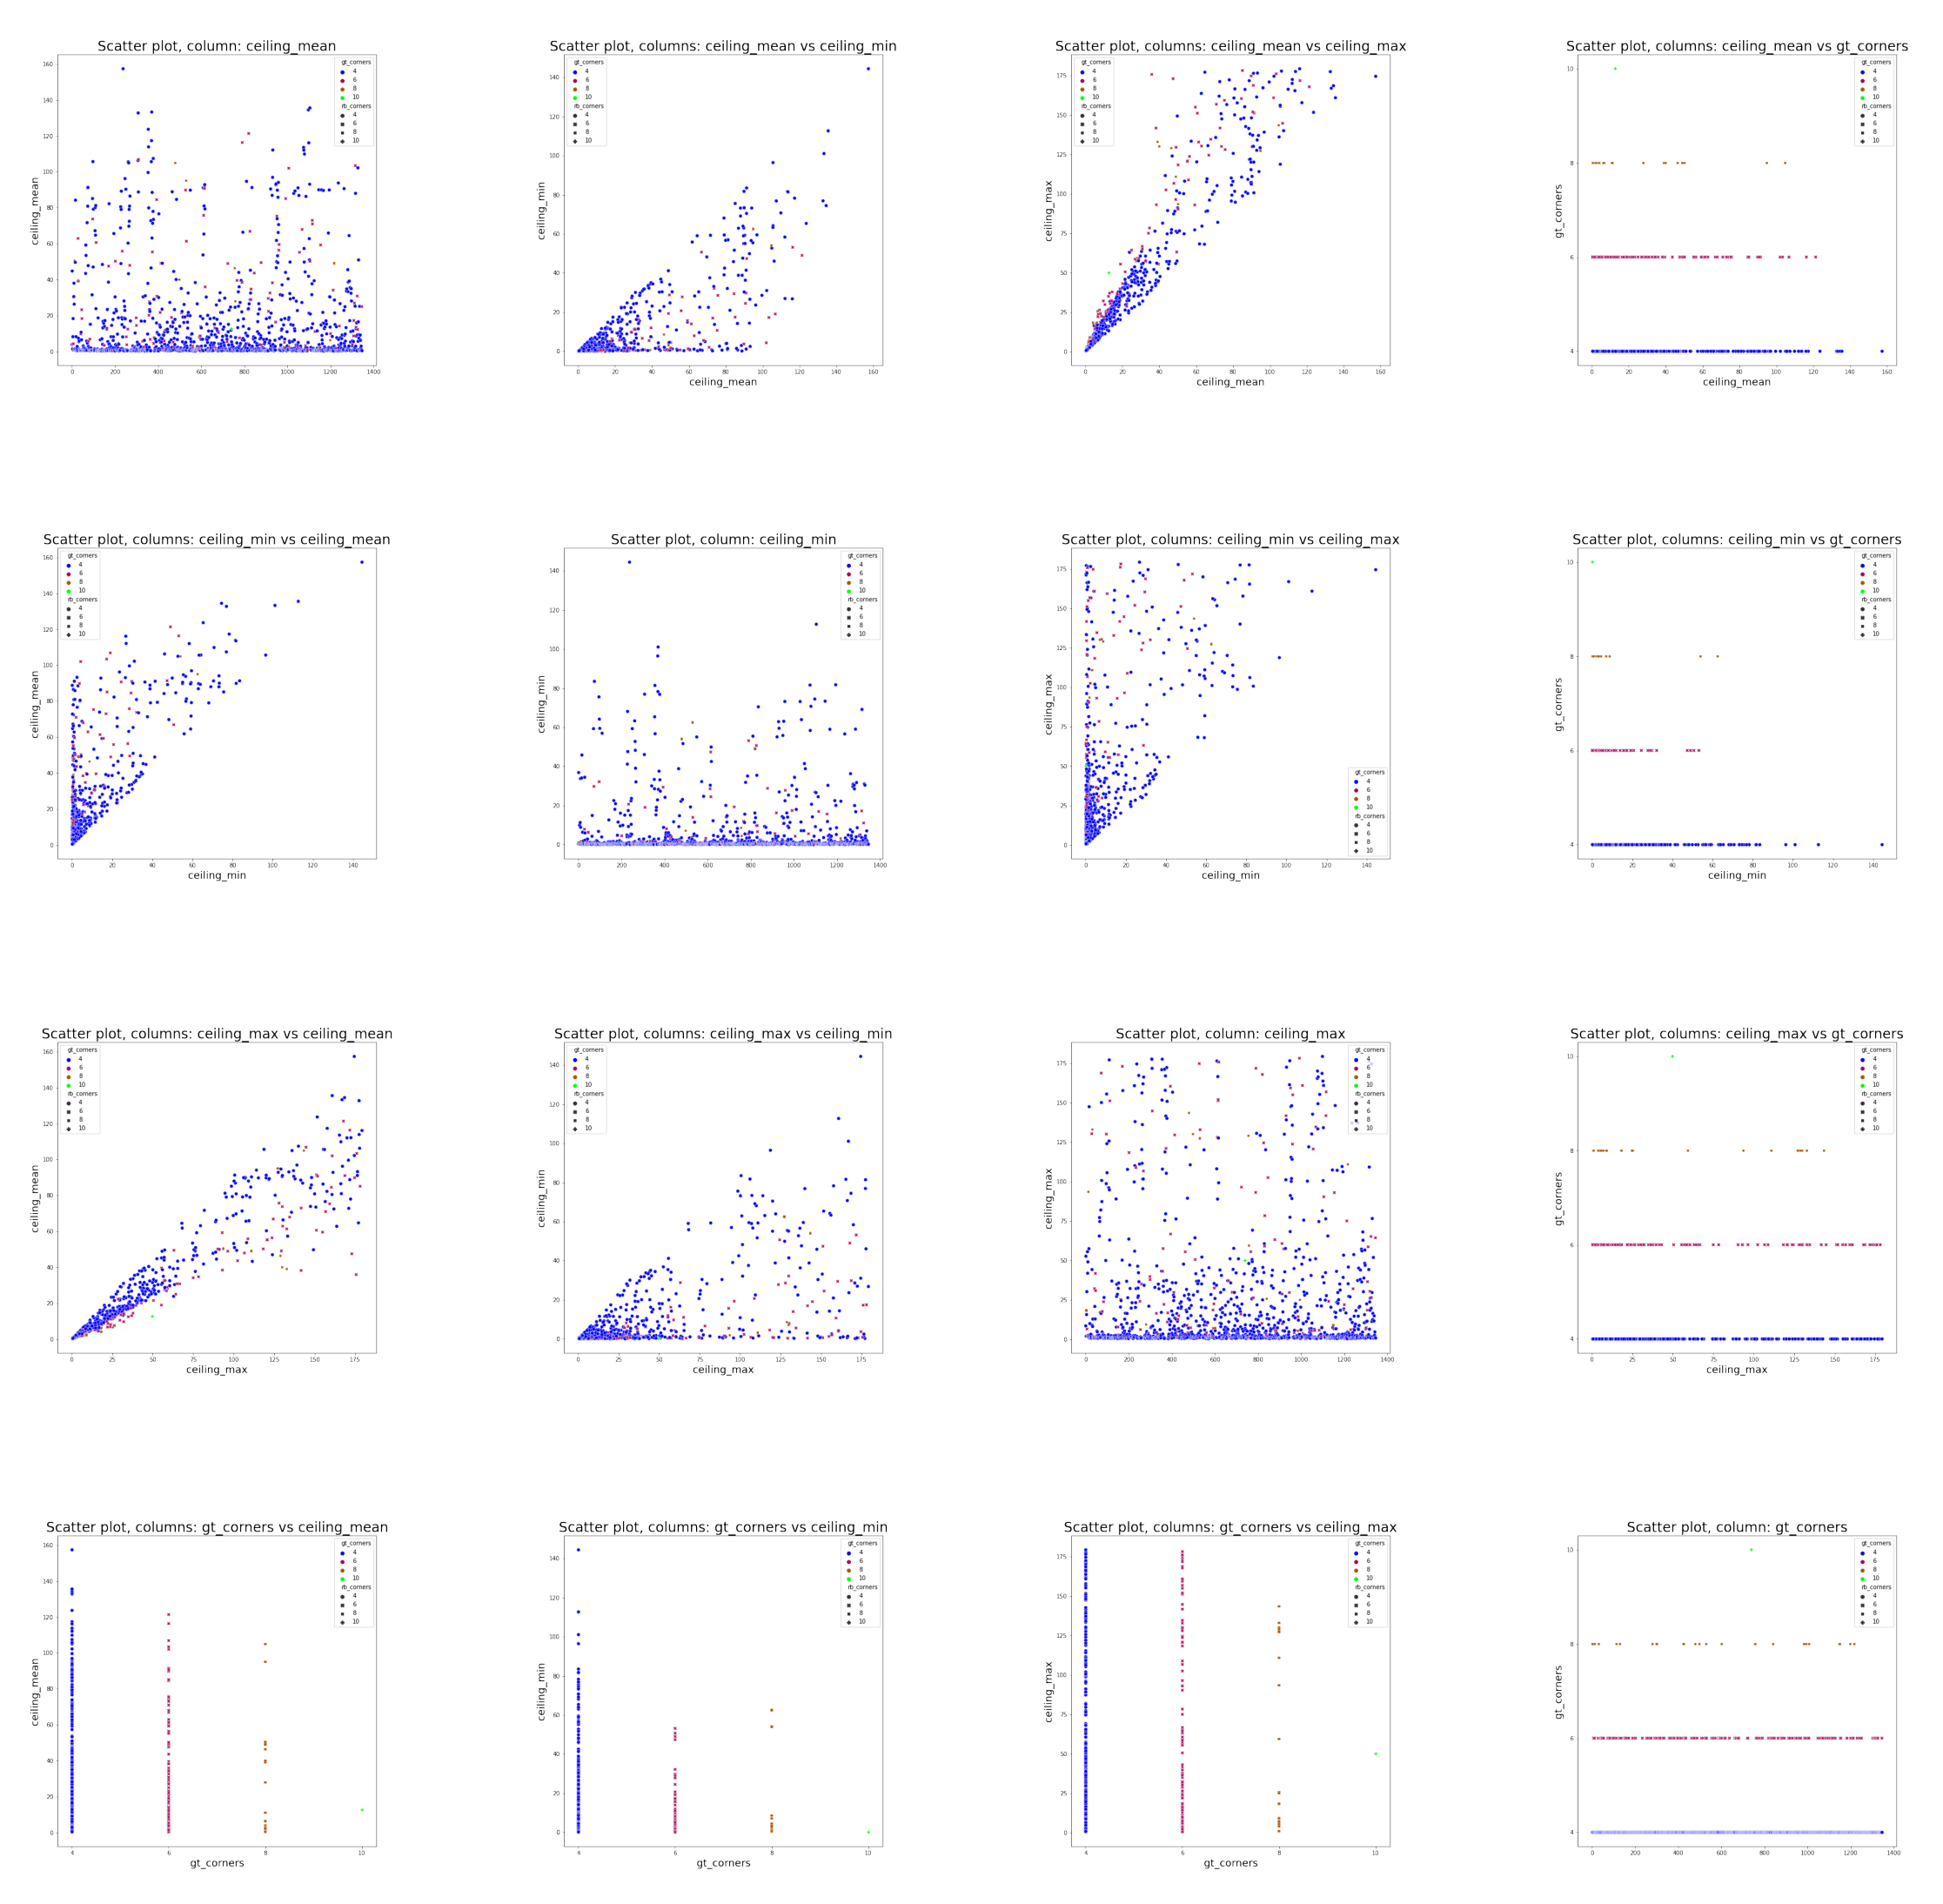

In [16]:
cols = ['ceiling_mean','ceiling_min','ceiling_max','gt_corners']
fig, axs = plt.subplots(len(cols),len(cols),figsize=(40,40))
for i in range(len(cols)):
    show_img(find_plot(paths_scatter,cols[i]),axs[i][i])
    for j in range(len(cols)):
        if i!=j:
            show_img(find_plot(paths_scatter,cols[i],cols[j]),axs[i][j])


## Please, visit https://github.com/maratsmuk/deviation_corners for further details